In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray') : 
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

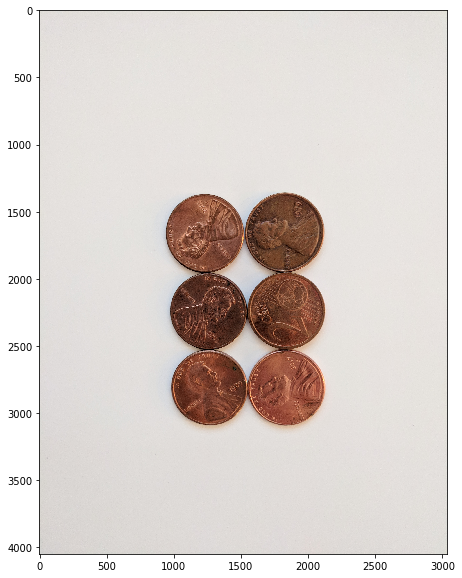

In [5]:
# READ THE IMAGE
sep_coins = cv2.imread('JPEG/pennies.jpg') 
img = cv2.imread('JPEG\pennies.jpg')   # DISPLAY
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display(img)

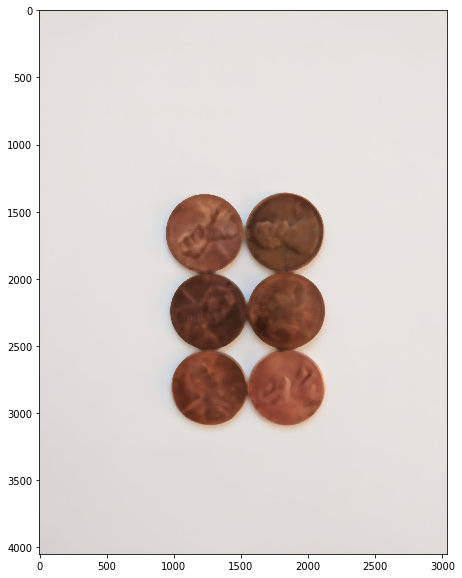

In [6]:
# APPLY BLUR
img = cv2.medianBlur(img,35) # DISPLAY
display(img)

In [7]:
# CONVERT TO GRAY SCALE
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

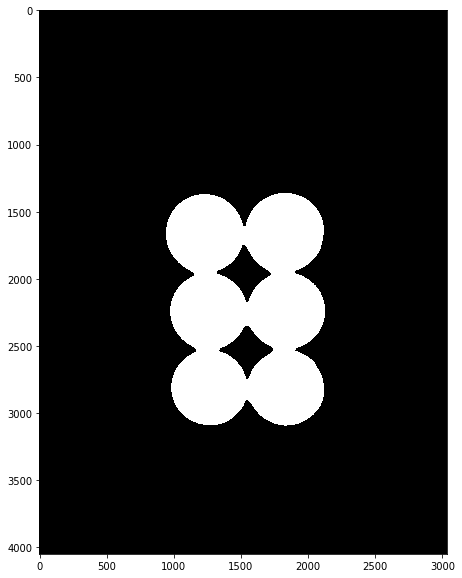

In [8]:
# APPLY THRESHOLD NOT BINARY ==> APPLY OTSU'S METHOD
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)  # DISPLAY
display(thresh)

In [9]:
# NOISE REMOVAL (OPTIONAL)
kernel = np.ones((3,3),np.uint8)

In [10]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)     # DISPLAY

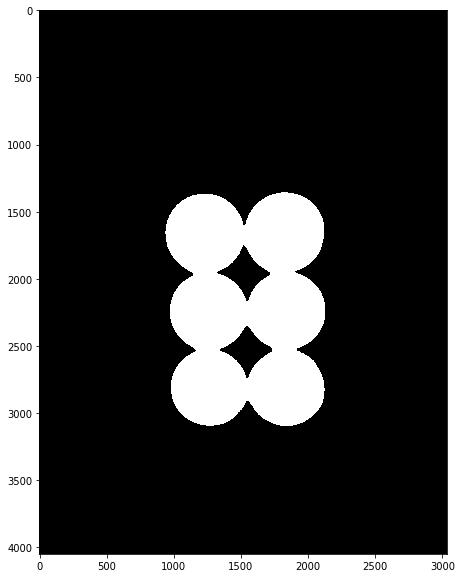

In [11]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)  # DISPLAY
display(sure_bg)

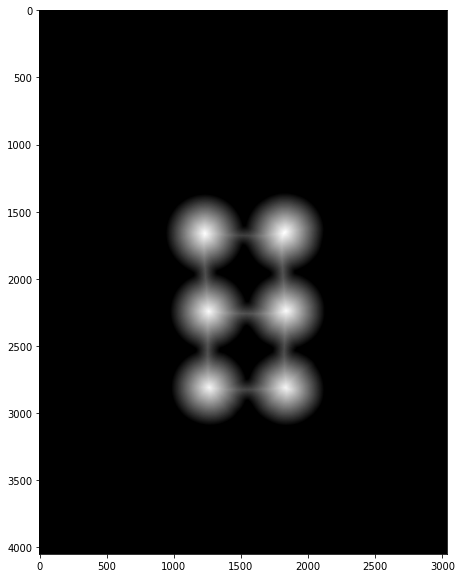

In [12]:
# DISTANCE TRANSFORM
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) # DISPLAY
display(dist_transform)

In [13]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

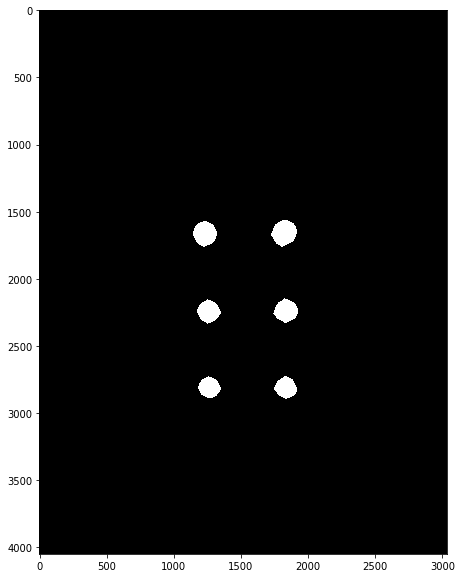

In [14]:
display(sure_fg)

In [15]:
sure_fg = np.uint8(sure_fg)

In [16]:
unknown = cv2.subtract(sure_bg,sure_fg)

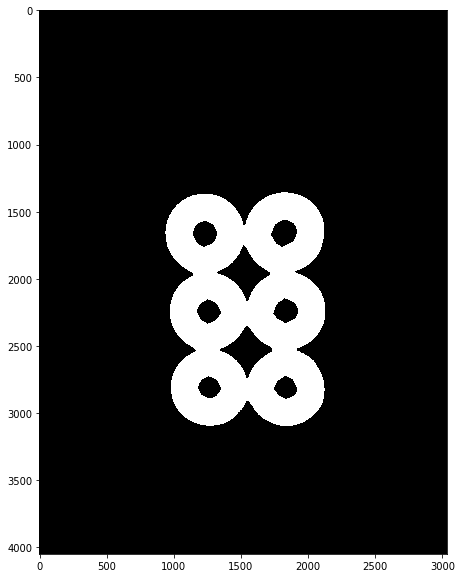

In [17]:
display(unknown)

In [18]:
# CREATING MARKERS => 3 STEPS

# 1. GETTING MARKERS

ret, markers = cv2.connectedComponents(sure_fg)

In [19]:
markers = markers + 1

In [18]:
markers[unknown == 255] = 0

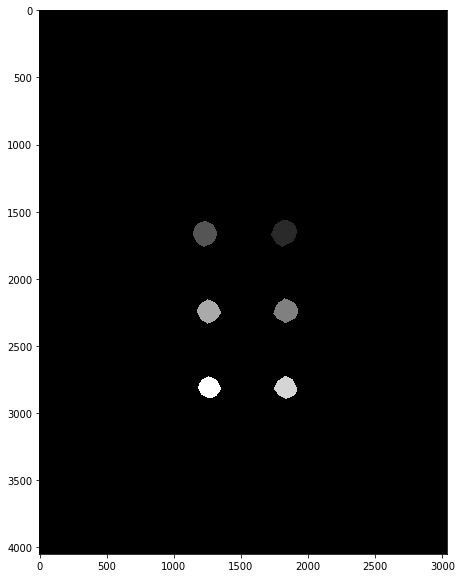

In [20]:
 display(markers)

In [21]:
markers = cv2.watershed(img,markers)

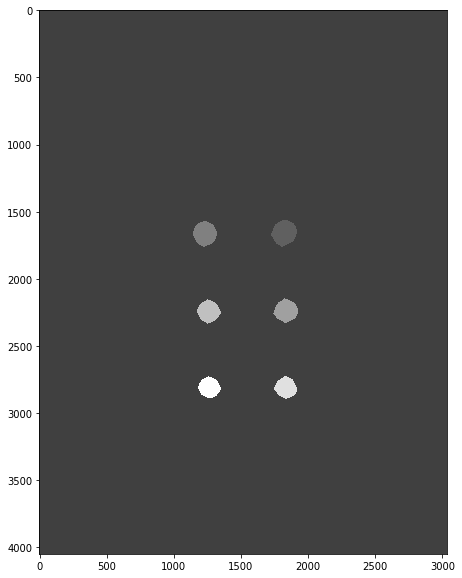

In [22]:
display(markers)

In [23]:
image, contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [24]:
for i in range(len(contours)) :
    if hierarchy[0][i][3] == -1 :
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

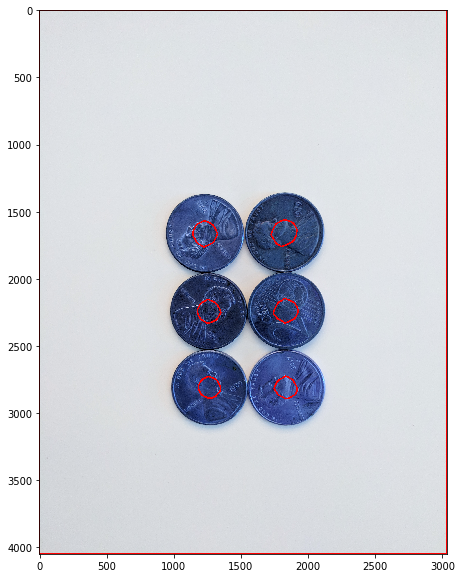

In [25]:
display(sep_coins)